In [1]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import investpy as inv

In [26]:
stk_data = inv.get_stock_historical_data(stock='AAPL',
                                        country='United States',
                                        from_date='01/01/2010',
                                        to_date='01/01/2020')
stk_data.head(7)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-01-04,7.62,7.66,7.58,7.64,493728704,USD
2010-01-05,7.66,7.70,7.62,7.66,601904640,USD
2010-01-06,7.66,7.69,7.53,7.53,552158912,USD
2010-01-07,7.56,7.57,7.47,7.52,477129760,USD
2010-01-08,7.51,7.57,7.47,7.57,447876768,USD
2010-01-11,7.60,7.61,7.44,7.50,462229920,USD
2010-01-12,7.47,7.49,7.37,7.42,594459712,USD


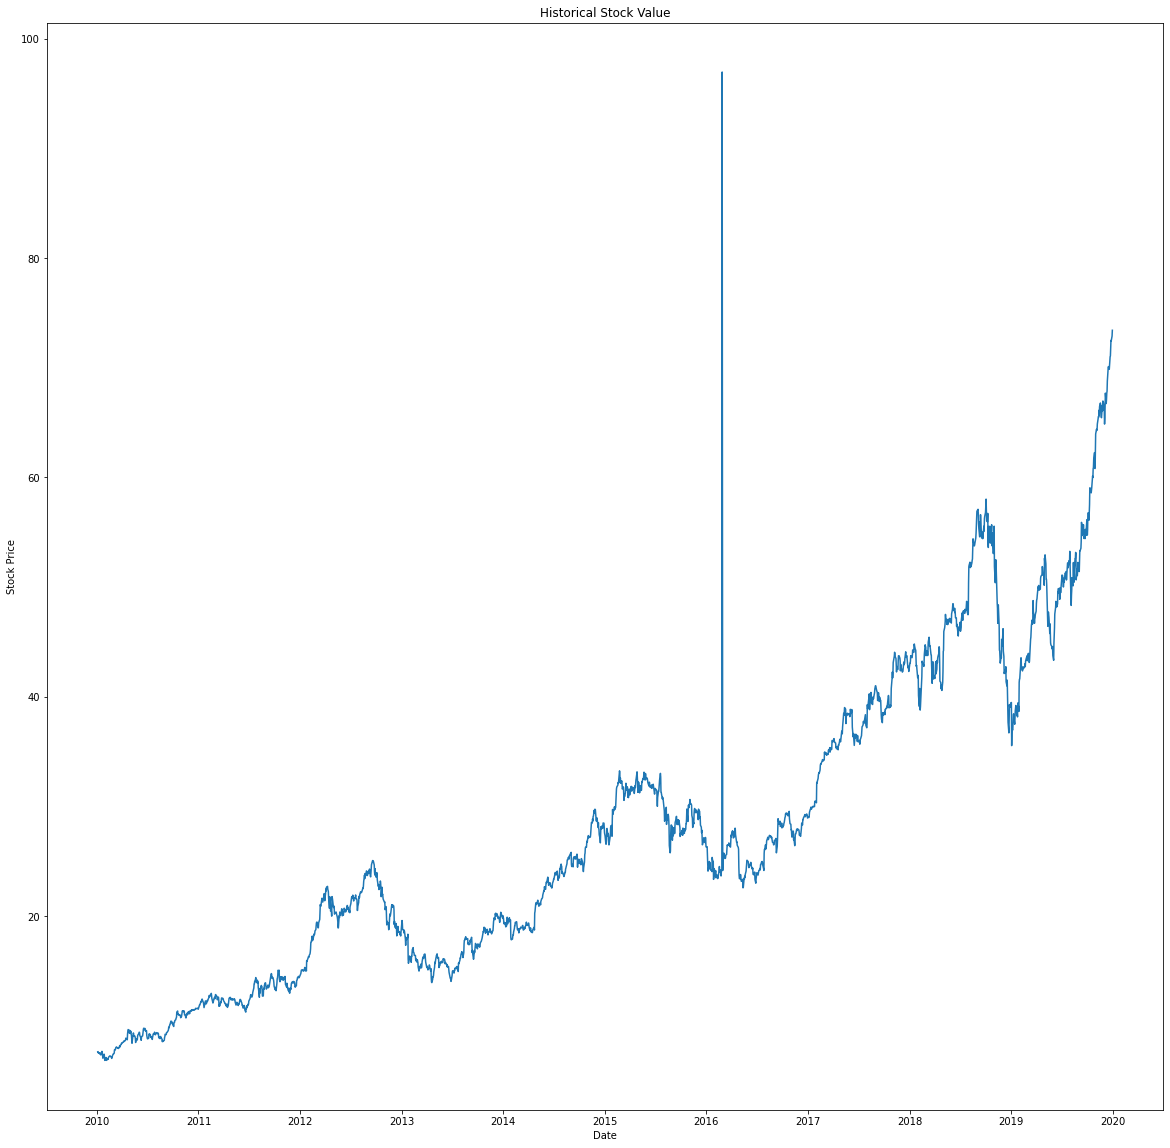

In [12]:
plt.figure(figsize=(20,20))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [29]:
stk_data['Date'] = stk_data.index
data2['Close'] = stk_data['Close']

In [30]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [23]:
train_set.shape

(2517, 1)

In [31]:
regressor = Sequential()#5 layer neyral net
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))#--1
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [38]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
45/45 [==============================] - 16s 361ms/step - loss: 0.0000e+00
Epoch 2/15
45/45 [==============================] - 18s 406ms/step - loss: 0.0000e+00
Epoch 3/15
45/45 [==============================] - 18s 411ms/step - loss: 0.0000e+00
Epoch 4/15
45/45 [==============================] - 19s 424ms/step - loss: 0.0000e+00
Epoch 5/15
45/45 [==============================] - 17s 385ms/step - loss: 0.0000e+00
Epoch 6/15
45/45 [==============================] - 18s 391ms/step - loss: 0.0000e+00
Epoch 7/15
45/45 [==============================] - 17s 385ms/step - loss: 0.0000e+00
Epoch 8/15
45/45 [==============================] - 16s 350ms/step - loss: 0.0000e+00
Epoch 9/15
45/45 [==============================] - 18s 393ms/step - loss: 0.0000e+00
Epoch 10/15
45/45 [==============================] - 12s 274ms/step - loss: 0.0000e+00
Epoch 11/15
45/45 [==============================] - 13s 297ms/step - loss: 0.0000e+00
Epoch 12/15
45/45 [==============================] -

In [39]:
testdataframe= inv.get_stock_historical_data(stock='AAPL',
                                        country='United States',
                                        from_date='01/01/2020',
                                        to_date='31/12/2020')
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Close'])
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Close'], testdata['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [40]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

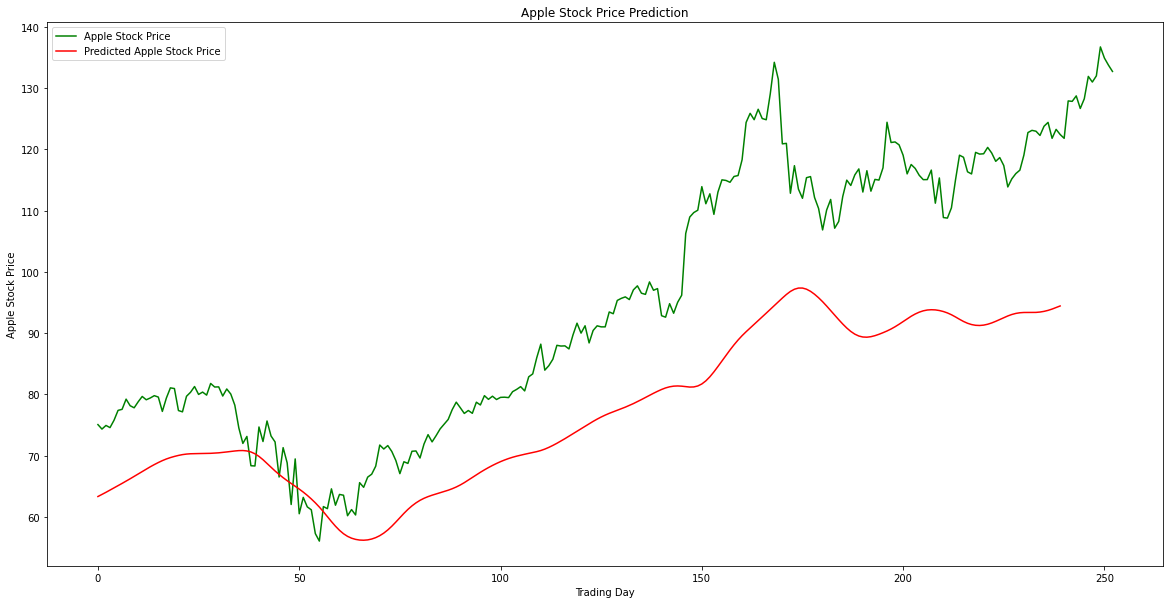

In [41]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Apple Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()